# Creating multi-panel figures

You can create yourself multi-panel figures by directly using the underlying Matplotlib objects. We however also provide a simplified way to create such panels by assembling multiple plot or animation objects. This is particularly helpful to create complex animations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io
from microfilm import microplot
from microfilm import microanim

In [3]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')

## Micropanel

First we create two microimages that we can adjust as we like

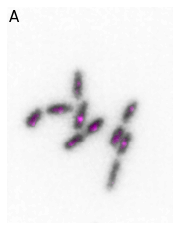

In [4]:
microim1 = microplot.microshow(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['Greys', 'magenta'], flip_map=[False, False],
                               label_text='A', label_color='black')

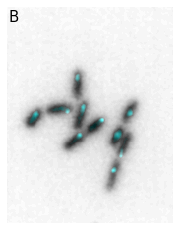

In [7]:
microim2 = microplot.microshow(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray_r', 'cyan'], flip_map=[False, False],
                               label_text='B', label_color='black')

Then we create a Micropanel object as aa grid and just add our two microimages. Those are then exactly reproduced, including annotations in the panels. Note that we can use any option used in ```matplotlib.pyplot.subplots()``` when creating the figure. Also the indices used to place the plots (e.g.g ```pos=[0,0]```) correspond to the xy position in the grid.

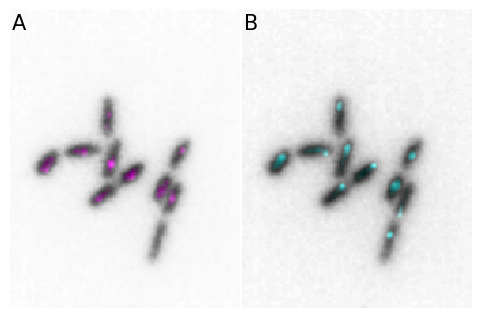

In [8]:
micropanel = microplot.Micropanel(rows=1, cols=2, figscaling=3)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

By default, the panel size is adjusted to optimall fit the image size. **Note that for this adjustment we assume that all images in the panel of the same size.** As shown above, you can adjust the general size of the image with the ```figscaling``` parameter. If you want, you can also explicitly specify a figure size in which case no adjustments are done:

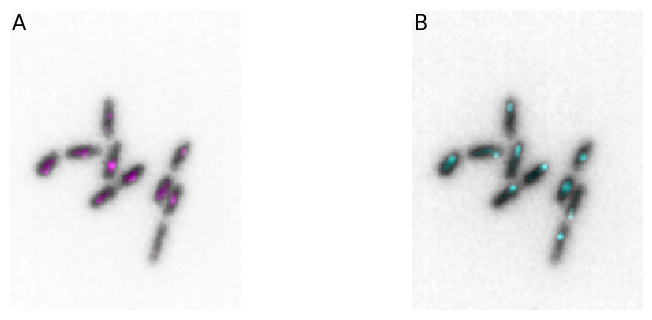

In [9]:
micropanel_size = microplot.Micropanel(rows=1, cols=2, figsize=[8,3], figscaling=3)

micropanel_size.add_element(pos=[0,0], microim=microim1)
micropanel_size.add_element(pos=[0,1], microim=microim2)

In the end you can save the panel with the regular ```savefig``` method:

In [10]:
micropanel.savefig('../illustrations/panel.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

## Avoiding double display

When you create a panel, you first create each element and then add it to the panel. When using ```microshow``` for plot creation, you will therefore see the plots first individually upon creation and then again in the panel. If you create plots for exports, this is not an issue, but if you want to display a panale as a result in a notebook, you might want to avoid this double display. In that case you can create each plot directly as ```Microimage``` objects, which won't display them:

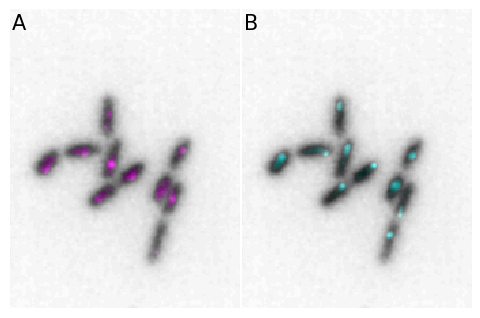

In [11]:
microim1 = microplot.Microimage(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['gray_r', 'magenta'], flip_map=[False, False],
                               label_text='A', label_color='black')

microim2 = microplot.Microimage(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray_r', 'cyan'], flip_map=[False, False],
                               label_text='B', label_color='black')

micropanel = microplot.Micropanel(rows=1, cols=2, figscaling=3)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

## Usage with options

Creation of panels of course works with all the options available in Microimage. For example we add here a label, channel names and a scalebar:

In [12]:
microim1 = microplot.Microimage(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['gray_r', 'magenta'], flip_map=[False, False],
                               label_text='A', label_color='black', channel_label_show=True,
                               channel_names=['nucleoid', 'ori'], scalebar_size_in_units=3,
                               scalebar_unit_per_pix=0.05, scalebar_color='black', scalebar_font_size=20,
                               unit='um', fig_scaling=4)

microim2 = microplot.Microimage(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray_r', 'cyan'], flip_map=[False, False],
                               label_text='B', label_color='black', channel_label_show=True,
                               channel_names=['nucleoid', 'ter'], scalebar_size_in_units=3,
                               scalebar_unit_per_pix=0.05, scalebar_color='black', scalebar_font_size=20,
                               unit='um', fig_scaling=4)

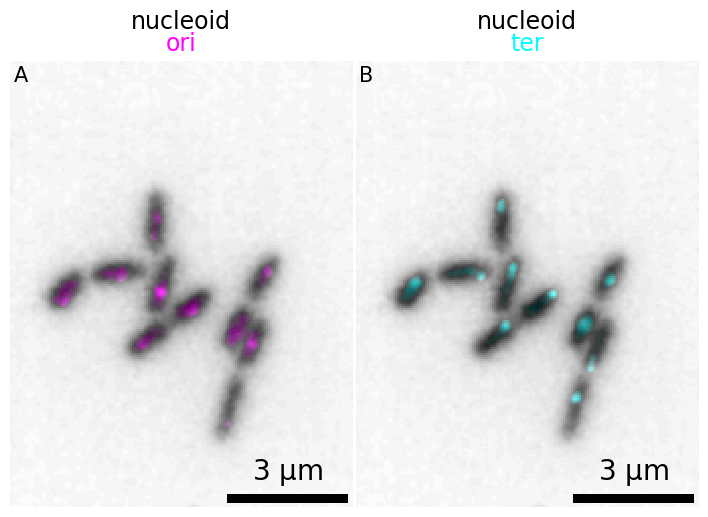

In [13]:
micropanel = microplot.Micropanel(rows=1, cols=2)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

micropanel.add_channel_label(channel_label_size=0.04)

## Adjusting size: accomodate colorbar

Note that in certain cases, you may want to control the space between plots. You can do this with the ```margin``` option which represents the fraction of the figure to use for that space. This is particularly useful if your images have colorbars, which are not fully visible with the default margin:

In [14]:
microim1 = microplot.Microimage(images=[image[1, 10, :, :]], show_colorbar=True,
                               cmaps=['magenta'], flip_map=[False],
                               label_text='A', label_color='black', channel_label_show=True,
                               channel_names=['ori'], scalebar_size_in_units=3,
                               scalebar_unit_per_pix=0.05, scalebar_color='white', unit='um', fig_scaling=4)

microim2 = microplot.Microimage(images=[image[2, 10, :, :]], show_colorbar=True,
                               cmaps=['cyan'], flip_map=[False],
                               label_text='B', label_color='black', channel_label_show=True,
                               channel_names=['ter'], scalebar_size_in_units=3,
                               scalebar_unit_per_pix=0.05, scalebar_color='white', unit='um', fig_scaling=4)

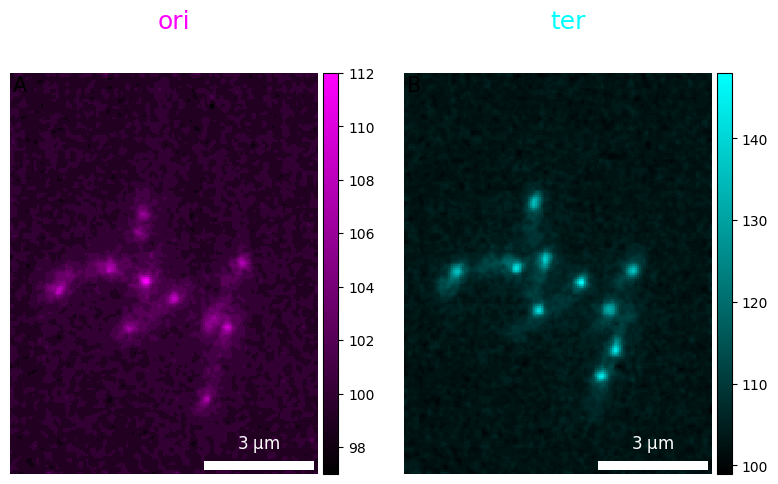

In [15]:
micropanel = microplot.Micropanel(rows=1, cols=2, margin=0.2)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

micropanel.add_channel_label(channel_label_size=0.04)

## Micropanel animations

The same principle applies for animations. We first create them separately to have full control over creation and tehn integrate them in the panel.

In [12]:
%matplotlib widget

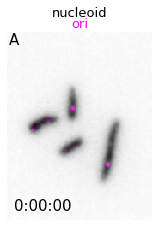

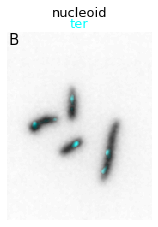

In [16]:
microanim1 = microanim.Microanim(data=image[[0,1],::], cmaps=['gray_r', 'magenta'],
                                 flip_map=[False, False], label_text='A', label_color='black',
                                channel_label_show=True, channel_names=['nucleoid', 'ori'])
microanim2 = microanim.Microanim(data=image[[0,2],::], cmaps=['gray_r', 'cyan'],
                                 flip_map=[False, False], label_text='B', label_color='black',
                                channel_label_show=True, channel_names=['nucleoid', 'ter'])

microanim1.add_time_stamp(unit='MM', unit_per_frame=3, location='lower-right', timestamp_color='black')

In [17]:
microanim1.ui

In [18]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_panels_1.png',width=300)

In [19]:
microanim2.ui

In [20]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_panels_2.png',width=300)

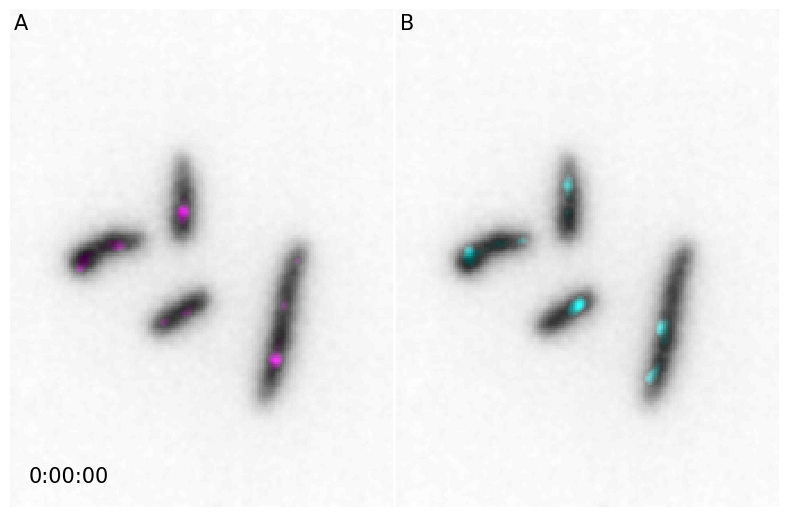

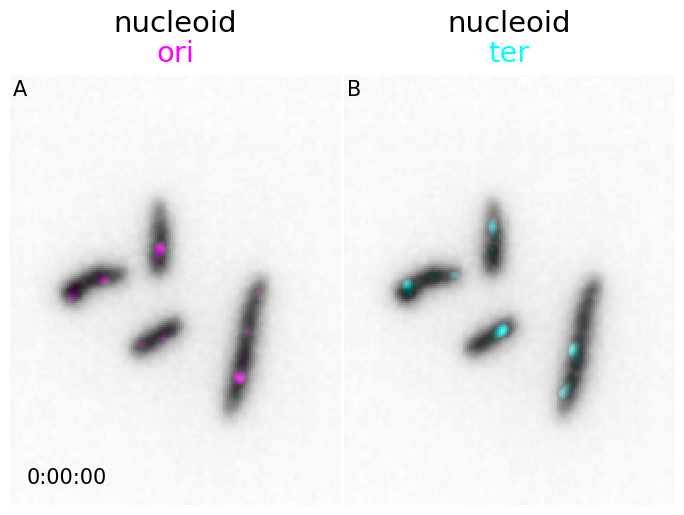

In [21]:
animpanel = microanim.Microanimpanel(rows=1, cols=2,)
animpanel.add_element(pos=[0,0], microanim=microanim1)
animpanel.add_element(pos=[0,1], microanim=microanim2)

animpanel.add_channel_label()

In [22]:
animpanel.ui

In [23]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_panels_3.gif',width=750)

Exporting the panel works the same way as for the simple animations. For example the above animation can be saved with:

In [24]:
animpanel.save_movie('../illustrations/panel.gif')

You get access to the underlying objects in the panel via the ```microanims``` parameter. Hence you can still update elements after assembling them. For example you could add a timer:

In [25]:
animpanel.microanims[0,1].add_time_stamp(unit='MM',unit_per_frame=3, location='lower_left', timestamp_color='red')

In [26]:
animpanel.ui

In [27]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_panels_4.png',width=750)